# Машинное обучение (семинары)

## Урок 10. Работа с признаками

Вам предстоит провести эксперименты с моделью машинного обучения и изучить процесс кросс-валидации и подбора гиперпараметров.

Ваша задача состоит в следующем:

1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.

2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.

3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.

4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.

7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

##### 1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.

In [25]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Скачиваем набор данных с scilit-learn
# from sklearn.datasets import load_wine

# # Загрузка данных
# data = load_wine()

# # Преобразование в DataFrame
# wine_df = pd.DataFrame(data.data, columns=data.feature_names)
# wine_df['target'] = data.target

# # Сохранение в CSV файл
# wine_df.to_csv('wine_data.csv', index=False)

In [3]:
# Загрузка данных из файла
wine_df = pd.read_csv("wine_data.csv")

In [4]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Информация об атрибутах (по порядку):

Alcohol - Алкоголь

Malic acid - Яблочная кислота

Ash - Осадок

Alcalinity of ash - Щёлочность осадка

Magnesium - Магний

Total phenols - Общие количество фенолов

Flavanoids - Флавоноиды

Nonflavanoid phenols Нефлаваноидные фенолы

Proanthocyanins - Проантоцианы

Color intensity - Интенсивность цвета

Hue - Оттенок

OD280/OD315 of diluted wines - OD280/OD315 разбавленных вин

Proline - Пролин

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Из общей информации iris_df следует:
1. DataFrame содержит 178 записей (от индекса 0 до 177)
2. Всего 14 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Колонки alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavonoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, OD280/OD315_of_diluted_wines, proline в формате float64
6. Колонки target в формате  int64

In [ ]:
# Статистический анализ числовых переменных
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
# Получение всех дубликатов
duplicate_iris_df = wine_df[wine_df.duplicated(keep=False)]

# Вывод количества дубликатов
number_of_duplicates = duplicate_iris_df.shape
print("number of duplicate rows: ", number_of_duplicates)

# Вывести сами дубликаты
print(duplicate_iris_df)

number of duplicate rows:  (0, 14)
Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, target]
Index: []


Дубликатов не обнаружено.

In [8]:
# Проверка на NaN значения
wine_df.isnull().any().any()

False

In [9]:
# Проверка на нулевые значения
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Пропущеных значений и NaN не обнаружено. 

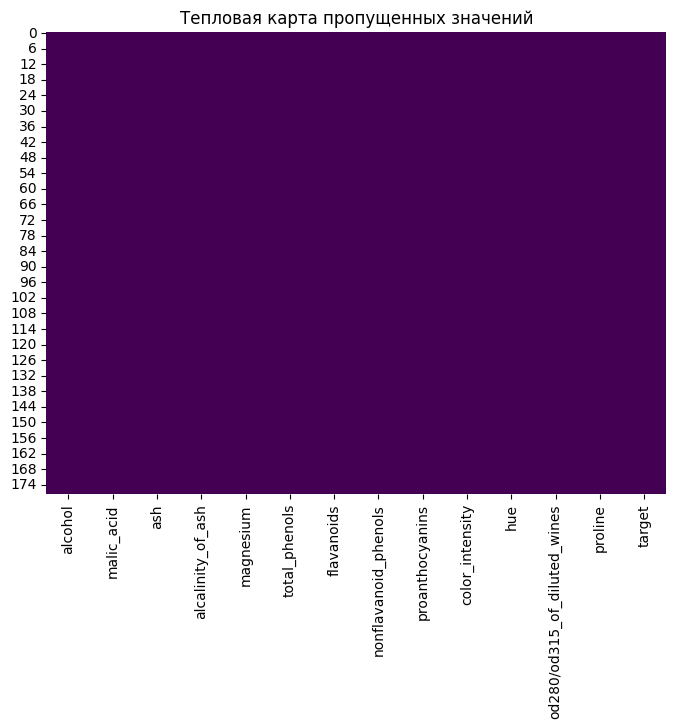

In [10]:
# Визуализация пропущенных значений (тепловая карта)
plt.figure(figsize=(8, 6))
sns.heatmap(wine_df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

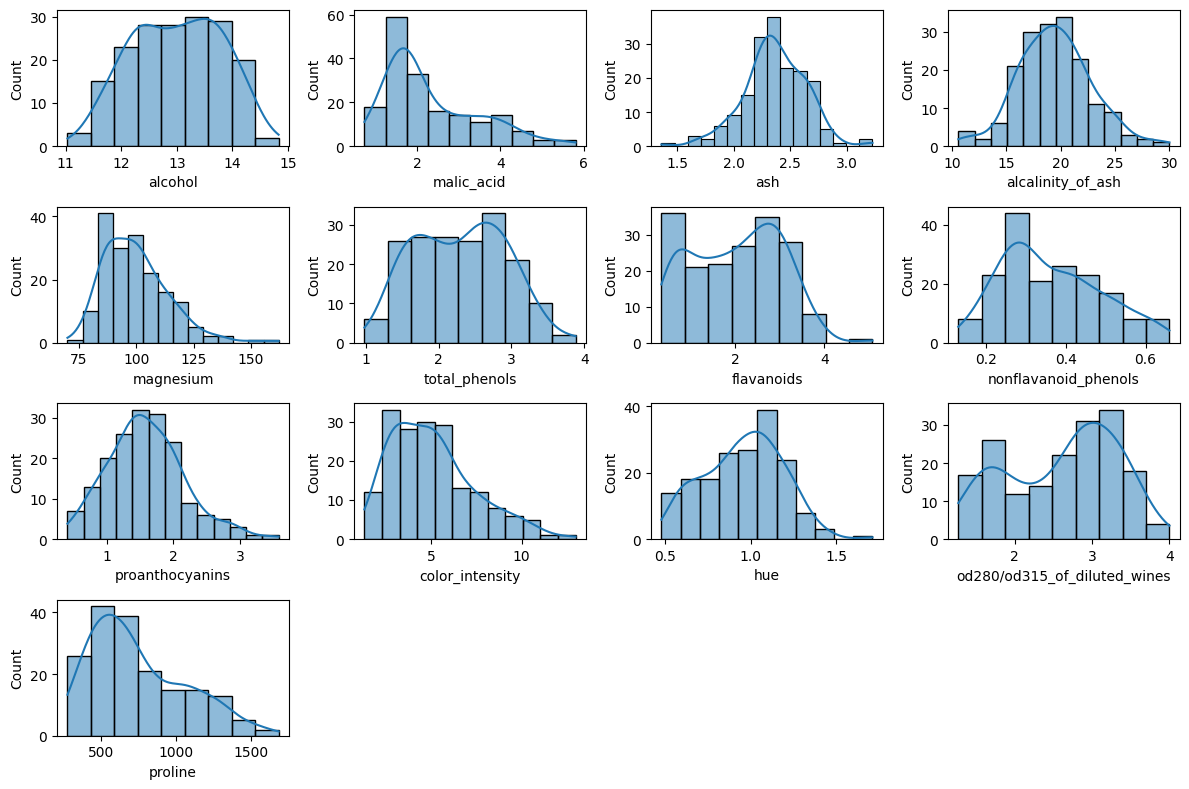

In [11]:
# Визуализация гистограмм 
plt.figure(figsize=(12, 8))
for i, column in enumerate(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'], 1):
    plt.subplot(4, 4, i)
    sns.histplot(wine_df[column], kde=True)

plt.tight_layout()
plt.show()

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_11496\3555407241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=wine_df, palette='Set2')


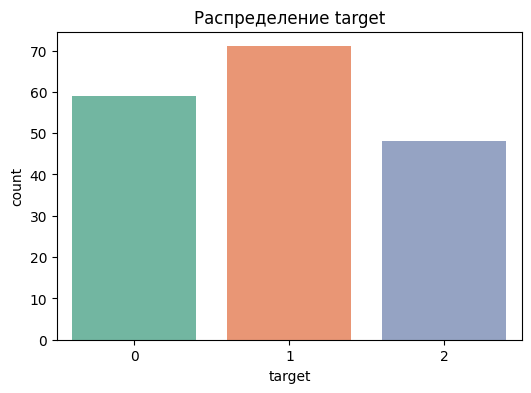

In [12]:
# Проверка баланса категириональных признаков
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=wine_df, palette='Set2')
plt.title("Распределение target")
plt.show()

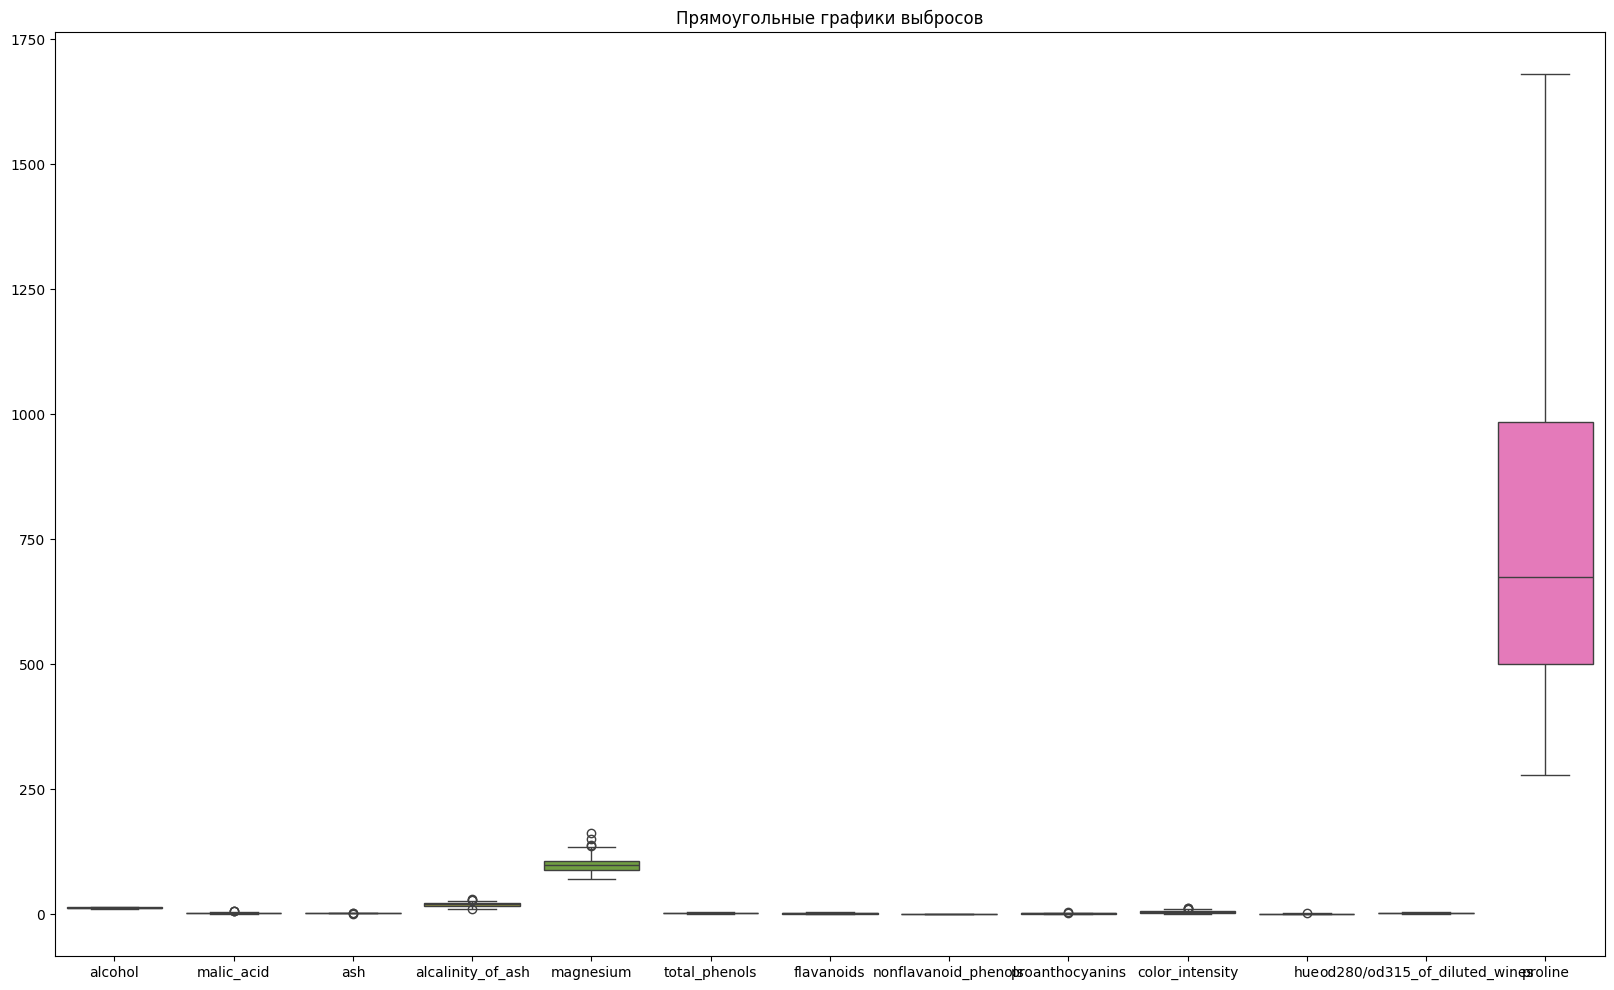

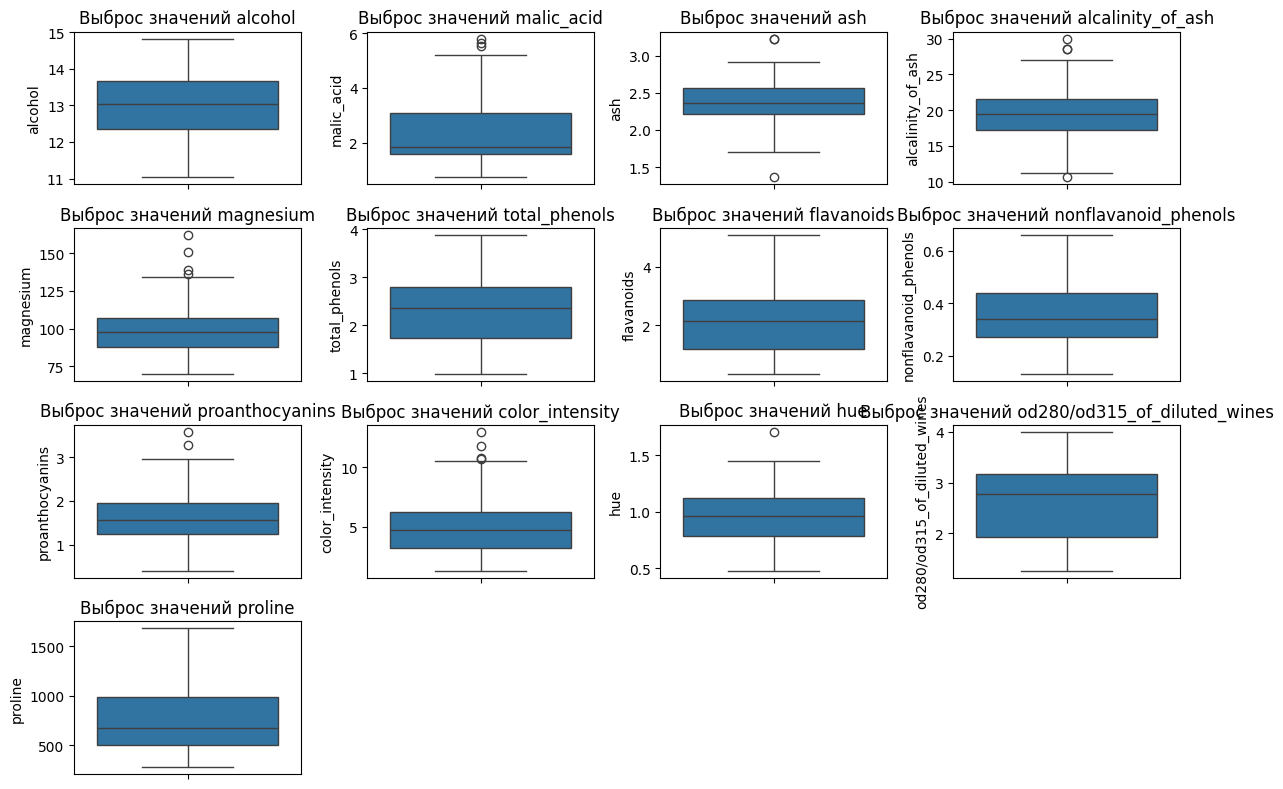

In [13]:
# Прямоугольные графики для визуализации распределений и потенциальных выбросов
# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

plt.figure(figsize=(20, 12))

sns.boxplot(data=wine_df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']])
plt.title("Прямоугольные графики выбросов")
plt.show()

plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=column, data=wine_df)
    plt.title(f"Выброс значений {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

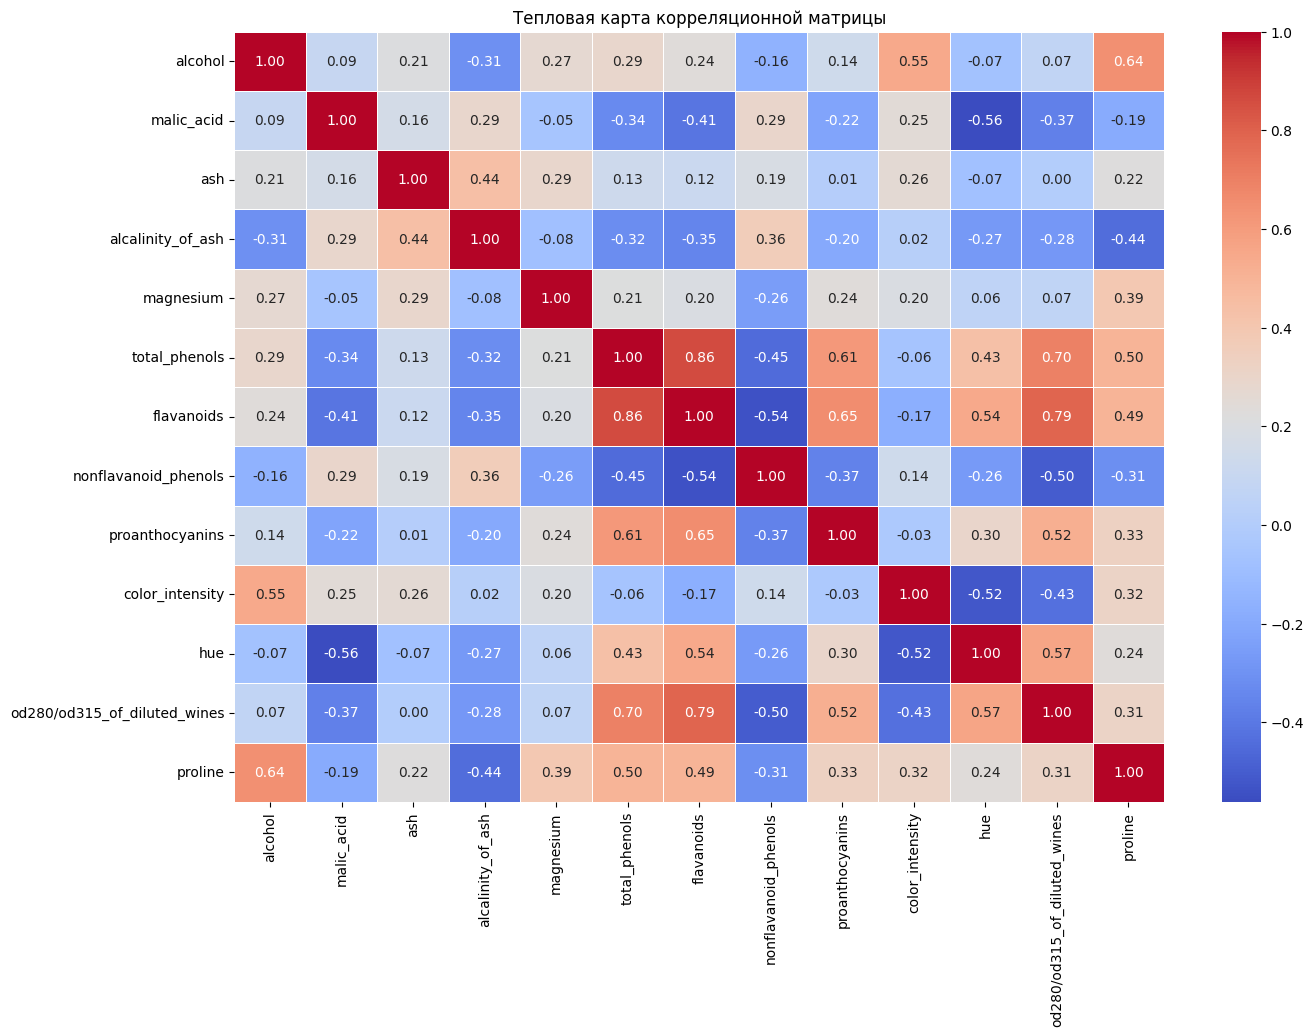

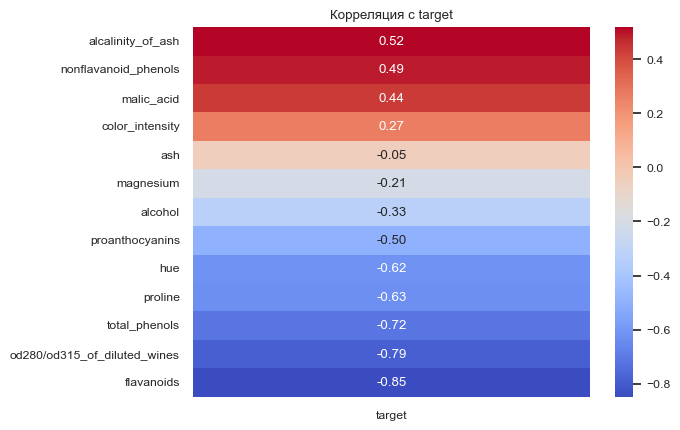

In [14]:
# Вычисляем корреляционную матрицу для обработанного DataFrame, Визуализация распределения нескольких выбранных числовых переменных
correlation_matrix_selected_columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

# Визуализация корреляции между выбранными переменными
correlation_matrix = wine_df[correlation_matrix_selected_columns].corr()
# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = wine_df.corr()
target_corr = corr['target'].drop('target')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с target')
plt.show()

##### 2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.

In [15]:
# Определение независимых и зависимых переменных
X = wine_df.drop(["target"], axis=1) # Независимые переменные
y = wine_df['target']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора Wine:", X_train.shape)
print("Размер тестового набора: Wine", X_test.shape)

Размер обучающего набора Wine: (142, 13)
Размер тестового набора: Wine (36, 13)


In [16]:
# Масштабирование признаков
scaler = MinMaxScaler()
scaler.fit(X_train) # Обучаем scaler на тренировочных данных

# Преобразование X_train
X_train_scaled = scaler.transform(X_train)

# Применение scaler к тестовым данным
X_test_scaled = scaler.transform(X_test)

# Проверка размеров и первых нескольких значений отмасштабированных данных
print("Отмасштабированные данные X_train:")
print(X_train_scaled[:5])  # первые 5 строк
print("\nОтмасштабированные данные X_test:")
print(X_test_scaled[:5])  # первые 5 строк

Отмасштабированные данные X_train:
[[0.87105263 0.16089613 0.71657754 0.74226804 0.30434783 0.62758621
  0.20464135 0.75471698 0.72151899 1.         0.07317073 0.25274725
  0.30102443]
 [0.39473684 0.94093686 0.68449198 0.74226804 0.2826087  0.27931034
  0.05485232 0.94339623 0.21518987 0.28952043 0.27642276 0.15384615
  0.18676123]
 [0.35263158 0.03665988 0.39572193 0.40721649 0.19565217 0.87586207
  0.71940928 0.20754717 0.48417722 0.24511545 0.45528455 0.54945055
  0.30102443]
 [0.64473684 0.15885947 0.68449198 0.61340206 0.20652174 0.55862069
  0.16033755 0.73584906 0.59177215 0.88898757 0.07317073 0.18681319
  0.26950355]
 [0.53684211 0.12423625 0.39572193 0.25257732 0.30434783 0.48965517
  0.48523207 0.28301887 0.30063291 0.1740675  0.56910569 0.52014652
  0.58471237]]

Отмасштабированные данные X_test:
[[0.68684211 0.45010183 0.64171123 0.2371134  0.5        0.59310345
  0.56751055 0.0754717  0.39240506 0.29840142 0.3902439  0.76556777
  0.44680851]
 [0.83684211 0.64154786 0.577

In [17]:
# Приведение отмасштабированных данных к типу pd.DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Проверка первых нескольких строк отмасштабированных DataFrame
print("Отмасштабированные данные X_train в формате DataFrame:")
print(X_train_scaled_df.head())  # первые 5 строк
print("\nОтмасштабированные данные X_test в формате DataFrame:")
print(X_test_scaled_df.head())  # первые 5 ст

Отмасштабированные данные X_train в формате DataFrame:
      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
158  0.871053    0.160896  0.716578           0.742268   0.304348   
137  0.394737    0.940937  0.684492           0.742268   0.282609   
98   0.352632    0.036660  0.395722           0.407216   0.195652   
159  0.644737    0.158859  0.684492           0.613402   0.206522   
38   0.536842    0.124236  0.395722           0.252577   0.304348   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
158       0.627586    0.204641              0.754717         0.721519   
137       0.279310    0.054852              0.943396         0.215190   
98        0.875862    0.719409              0.207547         0.484177   
159       0.558621    0.160338              0.735849         0.591772   
38        0.489655    0.485232              0.283019         0.300633   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
158         1.0000

##### 3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.

In [19]:
# Создание модели случайного леса
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление и вывод точности модели, генерация отчета о классификации, полноты и F1-меры
accuracy_train = accuracy_score(y_test, y_pred) 
precision_train = precision_score(y_test, y_pred, average='weighted')
recall_train = recall_score(y_test, y_pred, average='weighted')
f1_train = f1_score(y_test, y_pred, average='weighted')
report_train = classification_report(y_test, y_pred)

# Вывод результатов
print(f"Точность модели случайного леса: {accuracy_train:.2f}")
print(f"Полнота модели случайного леса: {recall_train:.2f}")
print(f"Оценка качества классификации случайного леса: {precision_train:.2f}")
print(f"F1-мера модели случайного леса: {f1_train:.2f}")
print("\nОтчет о классификации:\n", report_train)

Точность модели случайного леса: 1.00
Полнота модели случайного леса: 1.00
Оценка качества классификации случайного леса: 1.00
F1-мера модели случайного леса: 1.00

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



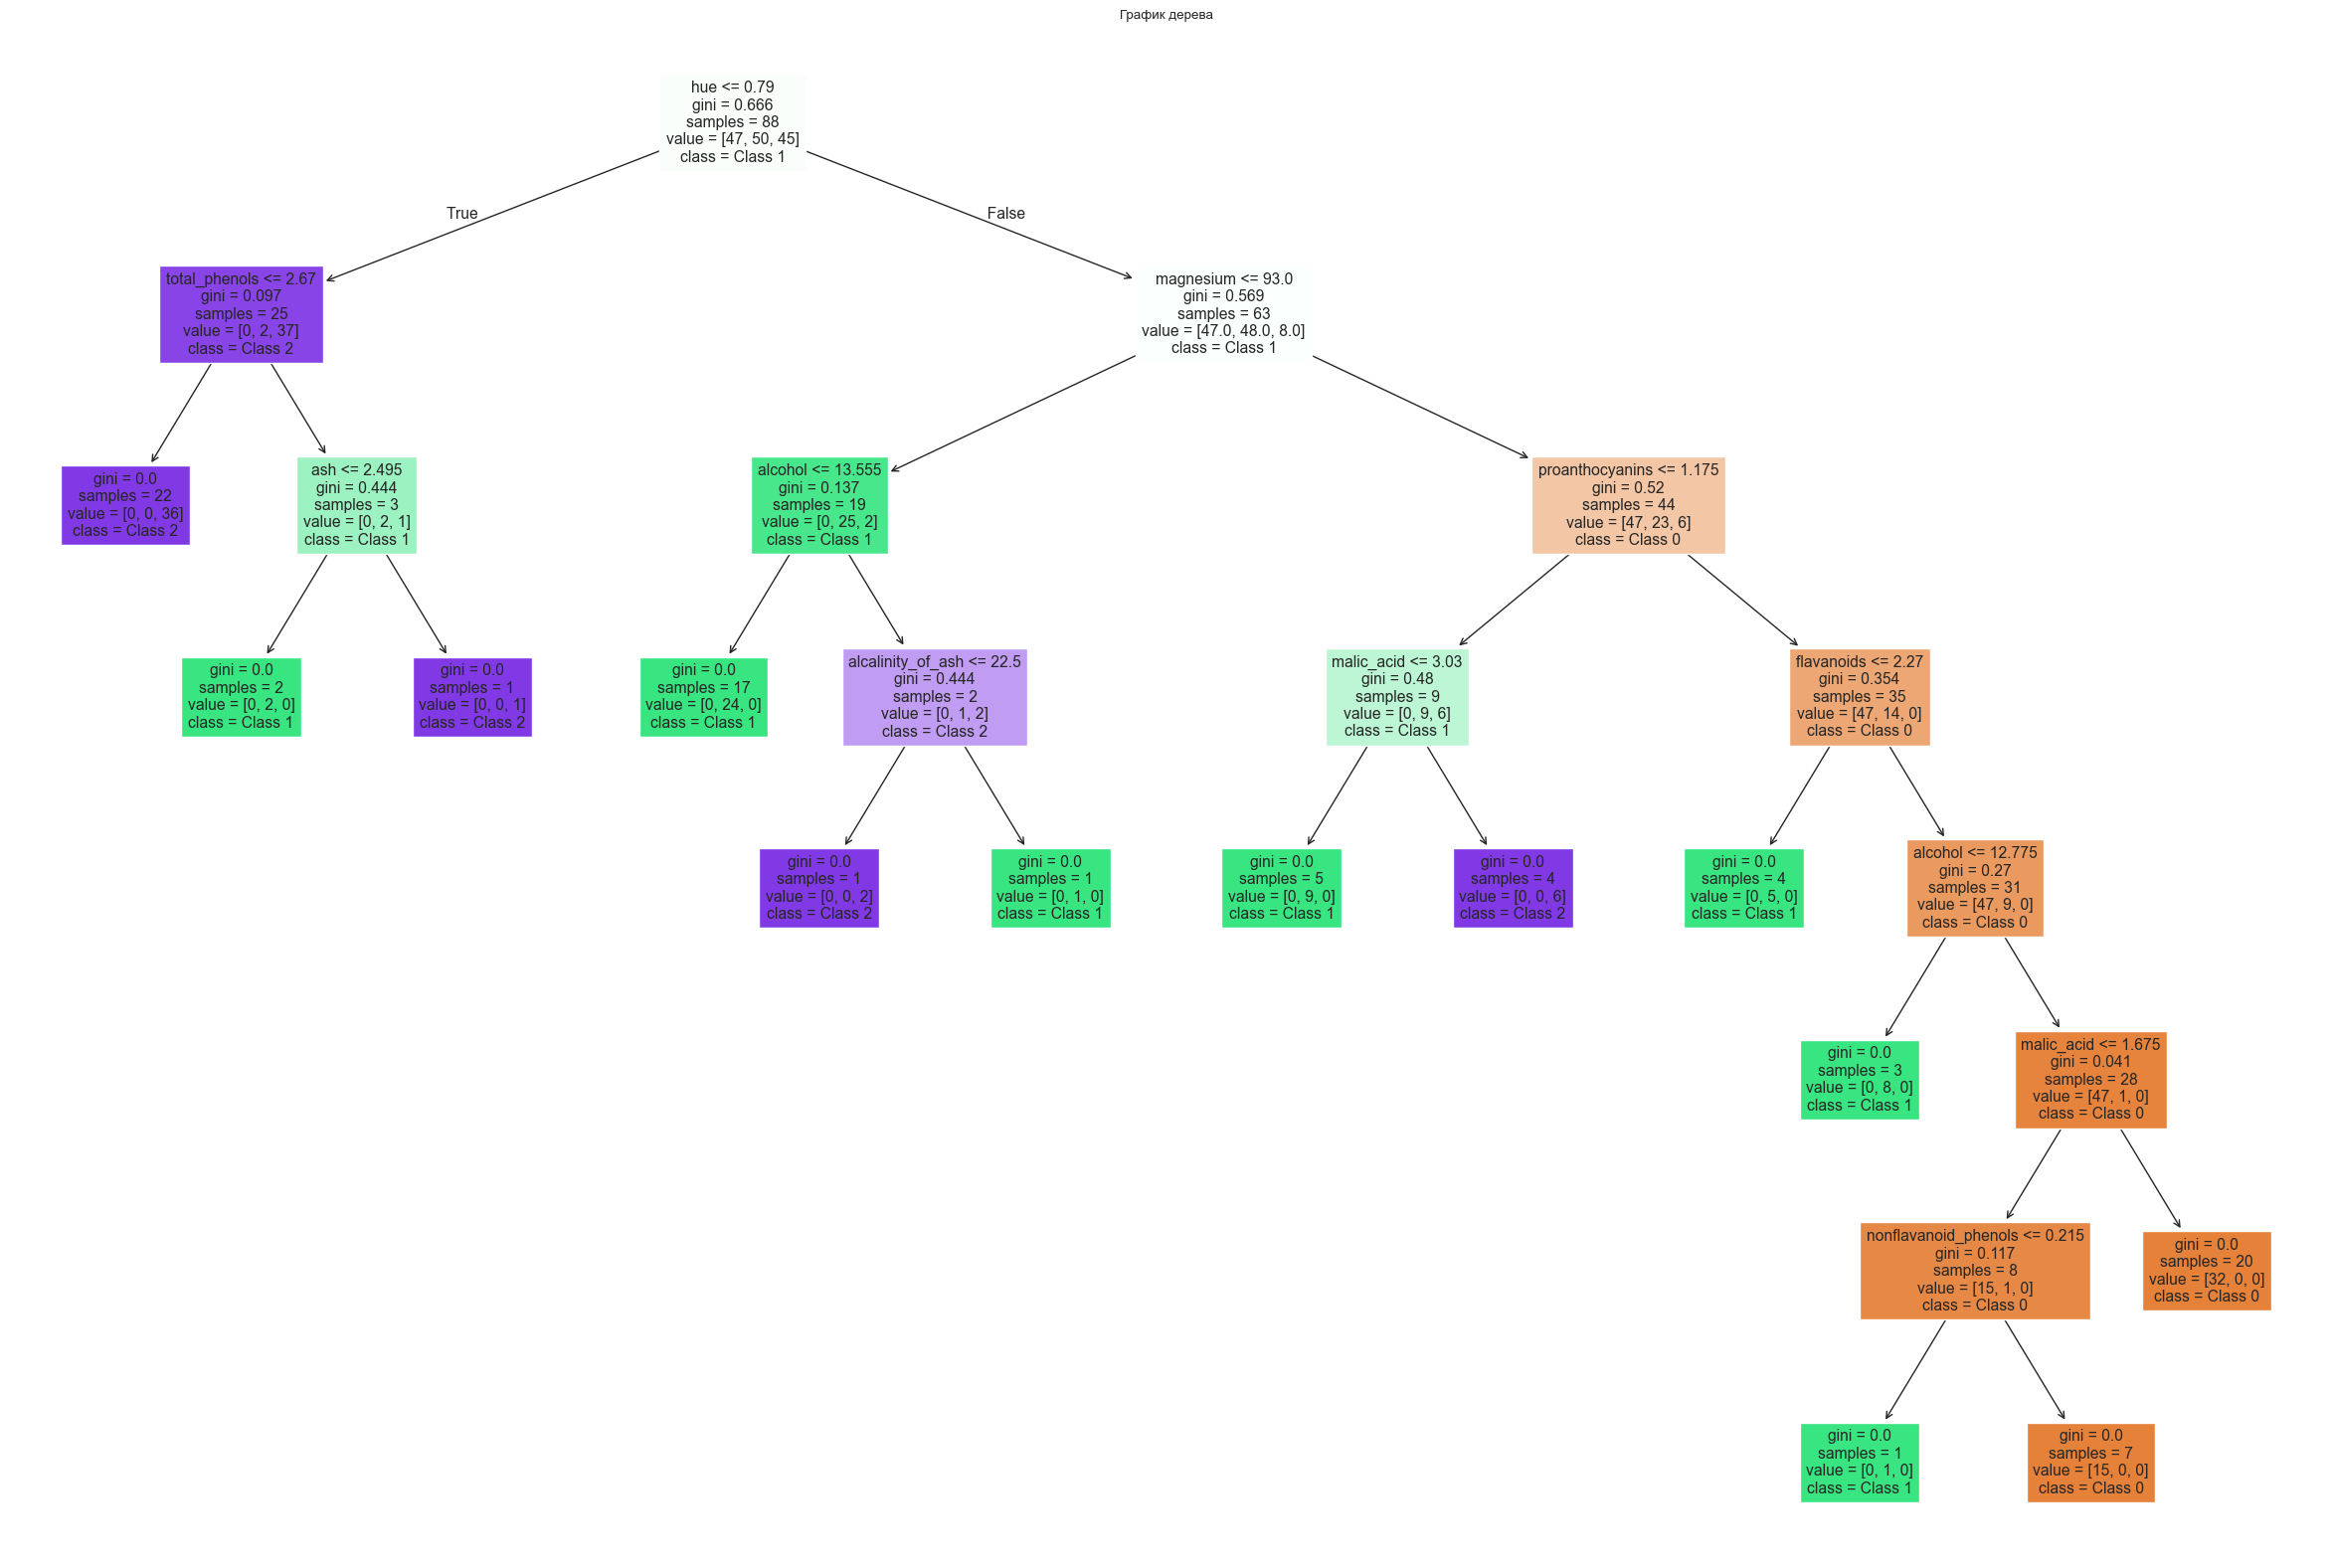

In [21]:
# Построение графика дерева
plt.figure(figsize=(30, 20))  

plot_tree(model.estimators_[0], filled=True, 
    feature_names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],  # Имена признаков
    class_names=['Class 0', 'Class 1', 'Class 2'])  # Имена классов
plt.title('График дерева')  
plt.show() 

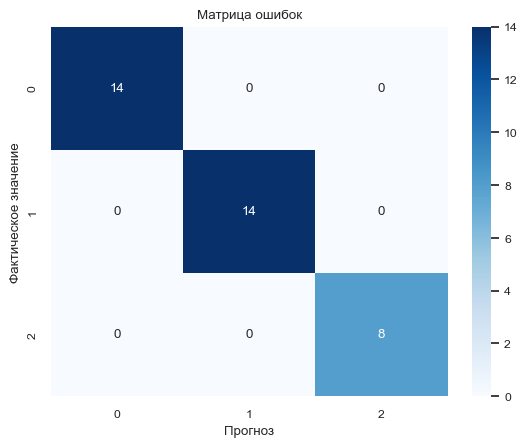

In [23]:
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show()

##### 4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

In [28]:
# Оценка производительности модели
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Кросс-валидация (точность):\n {cv_scores}')
print(f'Средняя точность: {cv_scores.mean()}')

Кросс-валидация (точность):
 [1.         1.         0.92857143 0.96428571 1.        ]
Средняя точность: 0.9785714285714286


##### 5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.

In [ ]:
# Определение параметров для подбора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f'Лучшие параметры: {grid_search.best_params_}')

##### 6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.

In [ ]:
# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Оценка производительности на тестовой выборке
test_accuracy = best_model.score(X_test, y_test)
print(f'Точность на тестовой выборке: {test_accuracy}')

##### 7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.